# Project: Investigating the TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Below is a brief analysis of the TMDB movie dataset which is downloaded from resources tab of Udacity for the purposes of this project. The Movie Database (TMDb) is a popular, user editable database for movies and TV shows.
The below analysis is done by making a thorough study of the dataset and it aims to answer the following questions: 
      >><li> Which genres are the most popular among film makers?
      >><li> Which genres are most popular from year to year?
      >><li> What kinds of properties are associated with movies that have high revenues?
      >><li> By how much does the adjusted revenue and revenue earned differ?
      >><li> How does the popularity affect the net profit earned?
  
  


In [1]:
# importing statements for all of the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [2]:
# Loading up the dataset and displaying first few rows
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Assessing the Data: 

In [3]:
# Finding out the shape
df.shape

(10866, 21)

In [4]:
# checking the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The above code reveals the datatypes of each columns. Looking at the output, we can see multiple columns that won't be relevant for our analysis Eg/- 'id','tagline' etc.. Therefore it is necessary to remove those as well as deal with the missing values on the other columns which we will be using.
Along with these, we will also be eliminating duplicates from our data. 

> Doing the above mentioned tasks will clean our data, and therefore we will be carrying out those tasks on the Data cleaning segment. 

In [5]:
# using describe to get better insights
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# checking for unique values in the dataset
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Data Cleaning:

> Data cleansing or data cleaning is the process of detecting and correcting corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data. 

> As mentioned earlier the data needs to be cleaned to remove the irregularities before we begin our analysis.

In [7]:
# Droping all irrelavant columns from the dataframe
df = df.drop(['id', 'imdb_id', 'homepage',  'tagline', 'keywords', 'director', 'overview', 'runtime', 'production_companies', 'cast','release_date'], axis = 1)
# rechecking the shape
df.shape

(10866, 10)

In [8]:
# view missing value count for each feature in dataframe
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

The code above gives us the total number of missing values in each column. From the output we can see that our dataframe has only one column 'genres', which has 23 missing values. Since the datatype of 'genres' is string therefore we cannot fill the missing values with the mean. So I have decided to remove all 23 rows where the values are missing.

In [9]:
# droping rows that has missing values 
df.dropna(inplace=True)
# rechecking after deletion
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [10]:
# checking for duplicates
sum(df.duplicated())

1

In [11]:
# droping duplicates
df.drop_duplicates(inplace=True)
# rechecking dataframe
sum(df.duplicated())

0

In [12]:
# rechecking the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
popularity        10842 non-null float64
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
genres            10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 931.7+ KB


 A quick look at the output reveals two columns namely 'budget' and 'revenue' have integer datatype whereas their adjusted value have float datatype. This needs to be fixed.

In [13]:
# changing datatypes

df = df.astype({"budget_adj": int, "revenue_adj": int})

In [14]:
# rechecking all columns with int
df.dtypes[df.dtypes ==  'int64']

budget          int64
revenue         int64
vote_count      int64
release_year    int64
budget_adj      int64
revenue_adj     int64
dtype: object

 A quick glance through the data reveals that there are various faulty data filled with '0' in some of the columns. Therefore we will be replacing them with the <i>mean</i> value of that particular column. <i> Although this might not be the most accurate approach but here we will be dealing with the missing data using mean. Other promising approaches include using Algorithms that Support Missing Values.</i>

> The columns like 'budget','revenue','budget_adj ' and 'revenue_adj' have faulty data filled with '0'. Therefore we will be checking these columns individually and replacing '0' with their respective mean values.

In [15]:
# checking budget columns which has multiple zeros
df.query('budget==0')

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.927333,0,29355203,Mr. Holmes,Mystery|Drama,425,6.4,2015,0,27006774
36,3.358321,0,22354572,Solace,Crime|Drama|Mystery,474,6.2,2015,0,20566197
72,2.272044,0,45895,Beyond the Reach,Thriller,81,5.5,2015,0,42223
74,2.165433,0,0,Mythica: The Darkspore,Action|Adventure|Fantasy,27,5.1,2015,0,0
75,2.141506,0,0,Me and Earl and the Dying Girl,Comedy|Drama,569,7.7,2015,0,0
88,1.959765,0,2000000,Equals,Drama|Romance|Science Fiction,135,5.6,2015,0,1839999
92,1.876037,0,0,Mythica: The Necromancer,Fantasy|Action|Adventure,11,5.4,2015,0,0
95,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Adventure|Animation|Comedy|Family,278,5.7,2015,0,215055014
100,1.724712,0,0,Frozen Fever,Adventure|Animation|Family,475,7.0,2015,0,0
101,1.661789,0,0,High-Rise,Action|Drama|Science Fiction,161,5.4,2015,0,0


In [16]:
# checking revenue columns which has multiple zeros
df.query('revenue==0')

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,2.932340,30000000,0,Wild Card,Thriller|Crime|Drama,481,5.3,2015,27599987,0
67,2.331636,20000000,0,Survivor,Crime|Thriller|Action,280,5.4,2015,18399991,0
74,2.165433,0,0,Mythica: The Darkspore,Action|Adventure|Fantasy,27,5.1,2015,0,0
75,2.141506,0,0,Me and Earl and the Dying Girl,Comedy|Drama,569,7.7,2015,0,0
92,1.876037,0,0,Mythica: The Necromancer,Fantasy|Action|Adventure,11,5.4,2015,0,0
93,1.872696,10000000,0,Vice,Thriller|Science Fiction|Action|Adventure,181,4.1,2015,9199995,0
100,1.724712,0,0,Frozen Fever,Adventure|Animation|Family,475,7.0,2015,0,0
101,1.661789,0,0,High-Rise,Action|Drama|Science Fiction,161,5.4,2015,0,0
103,1.646664,0,0,Spooks: The Greater Good,Thriller|Action,114,5.6,2015,0,0
116,1.380320,0,0,The Scorpion King: The Lost Throne,Action|Fantasy|Adventure,22,4.5,2015,0,0


In [17]:
# checking budget_adj columns which has multiple zeros
df.query('budget_adj==0')

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.927333,0,29355203,Mr. Holmes,Mystery|Drama,425,6.4,2015,0,27006774
36,3.358321,0,22354572,Solace,Crime|Drama|Mystery,474,6.2,2015,0,20566197
72,2.272044,0,45895,Beyond the Reach,Thriller,81,5.5,2015,0,42223
74,2.165433,0,0,Mythica: The Darkspore,Action|Adventure|Fantasy,27,5.1,2015,0,0
75,2.141506,0,0,Me and Earl and the Dying Girl,Comedy|Drama,569,7.7,2015,0,0
88,1.959765,0,2000000,Equals,Drama|Romance|Science Fiction,135,5.6,2015,0,1839999
92,1.876037,0,0,Mythica: The Necromancer,Fantasy|Action|Adventure,11,5.4,2015,0,0
95,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Adventure|Animation|Comedy|Family,278,5.7,2015,0,215055014
100,1.724712,0,0,Frozen Fever,Adventure|Animation|Family,475,7.0,2015,0,0
101,1.661789,0,0,High-Rise,Action|Drama|Science Fiction,161,5.4,2015,0,0


In [18]:
# checking revenue_adj columns which has multiple zeros
df.query('revenue_adj==0')

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,2.932340,30000000,0,Wild Card,Thriller|Crime|Drama,481,5.3,2015,27599987,0
67,2.331636,20000000,0,Survivor,Crime|Thriller|Action,280,5.4,2015,18399991,0
74,2.165433,0,0,Mythica: The Darkspore,Action|Adventure|Fantasy,27,5.1,2015,0,0
75,2.141506,0,0,Me and Earl and the Dying Girl,Comedy|Drama,569,7.7,2015,0,0
92,1.876037,0,0,Mythica: The Necromancer,Fantasy|Action|Adventure,11,5.4,2015,0,0
93,1.872696,10000000,0,Vice,Thriller|Science Fiction|Action|Adventure,181,4.1,2015,9199995,0
100,1.724712,0,0,Frozen Fever,Adventure|Animation|Family,475,7.0,2015,0,0
101,1.661789,0,0,High-Rise,Action|Drama|Science Fiction,161,5.4,2015,0,0
103,1.646664,0,0,Spooks: The Greater Good,Thriller|Action,114,5.6,2015,0,0
116,1.380320,0,0,The Scorpion King: The Lost Throne,Action|Fantasy|Adventure,22,4.5,2015,0,0


In [19]:
# calculating the mean values for these columns

mean_budget = df['budget'].mean()
mean_revenue = df['revenue'].mean()
mean_budget_adj = df['budget_adj'].mean()
mean_revenue_adj = df['revenue_adj'].mean()

# displaying the means

[mean_budget,mean_revenue,mean_budget_adj,mean_revenue_adj]

[14655309.268492898,
 39911384.050451949,
 17587121.211953513,
 51477974.708079688]

Now we will be replacing '0' with mean value of the respective columns

In [20]:
# replacing '0' in budget with the mean
df =df.replace({'budget': {0: mean_budget}})

In [21]:
# replacing '0' in revenue with the mean
df =df.replace({'revenue': {0: mean_revenue}})

In [22]:
# replacing '0' in budget_adj with the mean
df =df.replace({'budget_adj': {0: mean_budget_adj}})

In [23]:
# replacing '0' in revenue_adj with the mean
df =df.replace({'revenue_adj': {0: mean_revenue_adj}})

Lets recheck these columns to verify our work

In [24]:
# rechecking budget column 
df.query('budget==0')

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [25]:
# rechecking revenue column 
df.query('revenue==0')

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [26]:
# rechecking budget_adj column 
df.query('budget_adj==0')

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [27]:
# rechecking revenue_adj column 
df.query('revenue_adj==0')

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj


Hence we have fixed the faulty data issue.  

In [28]:
clean_data = df
clean_data

,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,1.100000e+08,2.952382e+08,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,1.900000e+08,1.506249e+09,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,1.350000e+08,5.329505e+08,The Revenant,Western|Drama|Adventure|Thriller,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,1.550000e+08,4.406035e+08,Terminator Genisys,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,1.080000e+08,5.953803e+08,The Martian,Drama|Adventure|Science Fiction,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,7.400000e+07,1.156731e+09,Minions,Family|Animation|Adventure|Comedy,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,1.750000e+08,8.537086e+08,Inside Out,Comedy|Animation|Family,3935,8.0,2015,1.609999e+08,7.854116e+08


Hence the data is cleaned and can be used to analyse to answer the questions.

<a id='eda'></a>
## Exploratory Data Analysis

>  Now that the data is trimmed and cleaned lets move on to exploration. Using statistics and visualizations lets aim to address the research questions that was posed in the Introduction section.


### Research Question 1: Which genres are the most popular among film makers?

>Before we begin we have found an irregularity where in 'genres' column where multiple genres are tagged in a single row for a particular film seperated by '|' . This must be fixed before we proceed with our analysis.

In [29]:
def sepgenre(df):
    return df.join(df.genres.str.strip('|').str.split('|',expand=True).stack().reset_index(level=1,drop=True).rename('genre')).reset_index(drop=True)
all_genres = sepgenre(clean_data)

Here we have split up the different genres tagged to a particular movie and stored each in one column renamed as 'genre'

In [30]:
# droping the 'genres' column

sep_genre = all_genres.drop('genres',axis = 1)
sep_genre

,popularity,budget,revenue,original_title,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre
0,32.985763,1.500000e+08,1.513529e+09,Jurassic World,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,32.985763,1.500000e+08,1.513529e+09,Jurassic World,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
2,32.985763,1.500000e+08,1.513529e+09,Jurassic World,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
3,32.985763,1.500000e+08,1.513529e+09,Jurassic World,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
4,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
5,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,6185,7.1,2015,1.379999e+08,3.481613e+08,Adventure
6,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,6185,7.1,2015,1.379999e+08,3.481613e+08,Science Fiction
7,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,6185,7.1,2015,1.379999e+08,3.481613e+08,Thriller
8,13.112507,1.100000e+08,2.952382e+08,Insurgent,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
9,13.112507,1.100000e+08,2.952382e+08,Insurgent,2480,6.3,2015,1.012000e+08,2.716190e+08,Science Fiction


In [31]:
#checking total movies in each genre
totalmovies=sep_genre['genre'].value_counts()
totalmovies

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genre, dtype: int64

Text(0,0.5,'Total no. of movies')

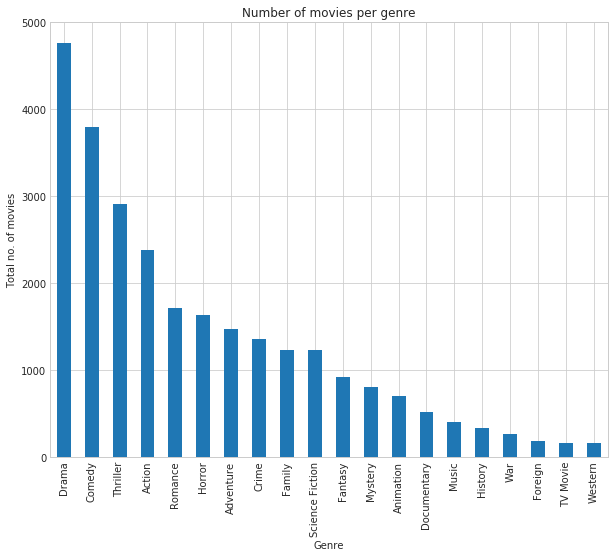

In [32]:
# ploting the data in a bar chart
totalmovies.plot(kind='bar',figsize = (10,8));
plt.title('Number of movies per genre')
plt.xlabel('Genre')
plt.ylabel('Total no. of movies')

This shows that there are more movies made of some specific genre. However this count is an approximation as movies which have multiple genres are counted as seperate films. 

### Research Question 2: Which genres are most popular from year to year?

>Now to check the popularity of genres we must find the mean popularity for each genre. This will be done by grouping the data by 'genre' and finding the mean value of popularity.

In [33]:
mean_genre = sep_genre.groupby('genre')['popularity'].mean()
mean_genre

genre
Action             0.926274
Adventure          1.154259
Animation          0.852182
Comedy             0.592607
Crime              0.744930
Documentary        0.181432
Drama              0.591495
Family             0.786668
Fantasy            0.992840
Foreign            0.191496
History            0.575936
Horror             0.465357
Music              0.487321
Mystery            0.690012
Romance            0.592082
Science Fiction    1.001548
TV Movie           0.270896
Thriller           0.741563
War                0.727683
Western            0.590615
Name: popularity, dtype: float64

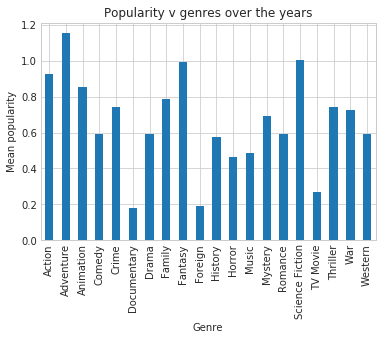

In [34]:
# plotting the data in a bar chart.
mean_genre.plot(kind = 'bar');
plt.xlabel('Genre')
plt.ylabel('Mean popularity')
plt.title('Popularity v genres over the years');

From the plot above it is very clear which genres are popular. It is clear that genres like Adventure, Action, Science Fiction and Fantasy are the most popular genres throughout the years whereas Documentary, Foreign and TV Movie have the least popularity.

### Research Question 3:  What kinds of properties are associated with movies that have high revenues?

In order to answer this question, we will have to check how revenue depends on various properties like vote_average, popularity and genre.

>Lets see how the revenue earned of a movie is influenced by its average vote count:

In [35]:
#grouping by average vote
vote_revenue = clean_data.groupby('vote_average')['revenue'].mean()
vote_revenue

vote_average
1.5    3.991138e+07
2.0    3.991138e+07
2.1    2.964403e+07
2.2    2.663216e+07
2.3    3.991138e+07
2.4    3.991138e+07
2.5    3.991138e+07
2.6    3.991138e+07
2.7    3.991138e+07
2.8    3.991138e+07
2.9    3.991138e+07
3.0    3.991138e+07
3.1    3.766252e+07
3.2    3.547681e+07
3.3    3.426516e+07
3.4    3.735765e+07
3.5    3.669661e+07
3.6    3.711268e+07
3.7    3.636265e+07
3.8    3.389841e+07
3.9    3.415118e+07
4.0    3.745061e+07
4.1    3.890694e+07
4.2    3.675144e+07
4.3    3.655577e+07
4.4    4.113284e+07
4.5    3.498384e+07
4.6    3.678093e+07
4.7    3.798715e+07
4.8    3.593724e+07
           ...     
6.1    6.811844e+07
6.2    6.160086e+07
6.3    6.203557e+07
6.4    7.290856e+07
6.5    7.552125e+07
6.6    7.382922e+07
6.7    5.531275e+07
6.8    7.042868e+07
6.9    7.558345e+07
7.0    7.622765e+07
7.1    8.175804e+07
7.2    7.977370e+07
7.3    1.098940e+08
7.4    1.081960e+08
7.5    1.210221e+08
7.6    1.075892e+08
7.7    1.269561e+08
7.8    1.063350e+08
7.9    

Here we have calculated the mean revenue earned for each average rating.

Text(0,0.5,'Mean revenue earned')

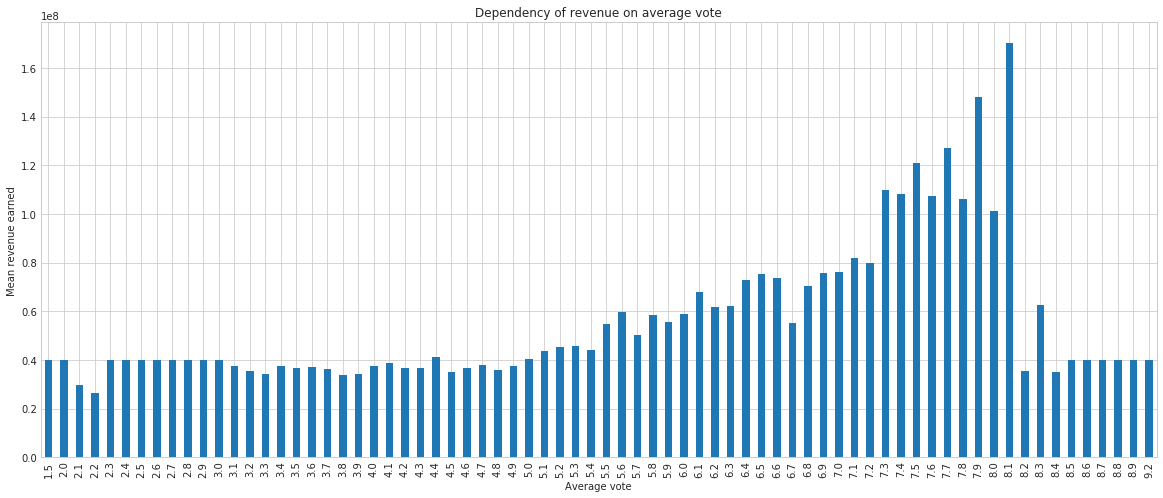

In [36]:
vote_revenue.plot(kind = 'bar', figsize=(20,8));
plt.title('Dependency of revenue on average vote')
plt.xlabel('Average vote')
plt.ylabel('Mean revenue earned')

The plot appears to be left-skewed. It also gives us insights that the highest earning movies received an average vote from 7 to 8.3 while the highest rated movies appears to make similar kind of revenues.  

Now lets see how the plot appears with the adjusted revenue.

In [ ]:
#grouping by adjusted average vote
vote_revenue_adj = clean_data.groupby('vote_average')['revenue_adj'].mean()
vote_revenue_adj.plot(kind = 'bar', figsize=(20,8));
plt.title('Dependency of adjusted revenue on average vote')
plt.xlabel('Average vote')
plt.ylabel('Mean adjusted revenue earned')

Text(0,0.5,'Mean adjusted revenue earned')

> Now lets take a look how popularity affects revenue earned.

In [ ]:
#grouping by popularity
popularity_revenue = clean_data.groupby('popularity')['revenue'].mean()
popularity_revenue

Now there seems to be a problem. There seems to be 10791 data points. This will crowd our visualisation so we wont be able to make sense of it.

However, I have decided to address this problem by simply getting rid of the floating point decimals of 'popularity' and changing it to int. This will decrease the data points considerably.

In [ ]:
#converting popularity to int
clean_data['int_popularity'] = clean_data['popularity'].astype(int)

In [ ]:
#grouping by int popularity
new_popularity_revenue = clean_data.groupby('int_popularity')['revenue'].mean()
new_popularity_revenue

In [ ]:
#ploting revenue based on popularity
new_popularity_revenue.plot(kind = 'bar', figsize=(10,8));
plt.title('Dependency of revenue on popularity')
plt.xlabel('popularity')
plt.ylabel('Mean revenue earned')

This plot shows how the popularity of a movie contributes toward its earnings. The highest earning movies has a popularity of 32.

>Now lets take a look how popularity affects revenue earned.

In [ ]:
#grouping revenue by genre
revenue_genre = sep_genre.groupby('genre')['revenue'].mean()
revenue_genre

In [ ]:
#plot of revenue earned based on genre
revenue_genre.plot(kind = 'bar',figsize=(10,8))
plt.title('Dependency of revenue on genre')
plt.xlabel('Genre')
plt.ylabel('Mean revenue earned')

From this plot its evident that genres like Adventure, Animation and Fantasy are the highest earning genres whereas Foreign and Documentary has the least earning.

### Research Question 4: By how much does the adjusted revenue and revenue earned differ?

To calculate this, lets check out the difference between the two and taking the mean of the data obtained.

In [ ]:
clean_data['diff'] = clean_data['revenue']-clean_data['revenue_adj']
clean_data.groupby('release_year')['diff'].mean().describe()

>Lets plot the 'diff ' against the release_year to check how much the adjusted value differs from the original.

In [ ]:
#plot of difference
clean_data.groupby('release_year')['diff'].mean().plot(kind = 'bar', figsize = (20,8));
plt.title('Mean Difference between revenue and adjusted revenue')
plt.xlabel('Years')
plt.ylabel('Difference between revenue and adjusted revenue')


This plot shows how much the original revenue earned varies from the adjusted over the years.

### Research Question 5:How does the popularity affect the net profit earned? 

> First lets calculate the net profit earned by each movie and then lets find the correlation between the two variables.

In [ ]:
#calculating the profit
def profit_calculation(df):
    return df['revenue'] - df['budget']
df['profit'] = profit_calculation(clean_data)

>Now lets find the correlation coefficient between net profit and popularity

In [ ]:
# calculating the correlation coefficient
corelation = df['profit'].corr(df['popularity'])
corelation

This tells us that there is a positive correlation between the two and the association of the two variables is strong. So now lets plot 'profit' against 'Popularity' to see their association.

In [ ]:
#ploting the scatter plot between net profit and popularity
df.plot(x='profit', y='popularity', kind='scatter', figsize=(15,10));
plt.title('Profit V Popularity')
plt.xlabel('Profit')
plt.ylabel('Popularity')

Here the value greater than 0 indicates a positive association; that is, as the value of one variable increases, so does the value of the other variable.

## Limitations:

There are a few limitations to this analysis which I would like to highlight below.

<li>Since the data was messy, therefore I have decided to drop a few columns were dropped during the 
analysis.
<li> Many columns had faulty data filled with zeros which was replaced by the mean value. This 
is an approximation.
<li> While answering Q1, the genres were split and counted. This means that the count included 
counting the same movie multiple times where multiple genres existed.
<li> The average vote for a particular movie is dependent on the total number of voters. Hence concluding a fact based on average vote might not be perfect because a movie tends to drop its average rating with the increase of its voters.

<a id='conclusions'></a>
## Conclusions

This analysis showcases various aspets of the TMDB dataset. Various approximation techniques like using mean value have been used to fill faulty data points.

Hence the analysis shows that viewers are genre biased and the factors like popularity,average vote etc has a direct impact on its earnings. 
## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])